In [64]:
# load in Pandas and Altair
import pandas as pd

import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
print(alt.renderers.active)

notebook


In [2]:
#read in the data
RedCard = pd.read_csv('data/redcard.csv')

In [3]:
RedCard.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [4]:
RedCard.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [5]:
RedCard['yellowReds'].unique()

array([0, 1, 2, 3])

In [6]:
RedCard['redCards'].unique()

array([0, 1, 2])

In [7]:
RedCard['yellowCards'].unique()

array([ 0,  1,  2,  3,  4,  5, 11,  6,  8, 10,  9,  7, 14, 13, 12])

In [8]:
RedCard.isna().sum()

playerShort          0
player               0
club                 0
leagueCountry        0
birthday             0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowCards          0
yellowReds           0
redCards             0
photoID          21407
rater1           21407
rater2           21407
refNum               0
refCountry           0
Alpha_3              1
meanIAT            163
nIAT               163
seIAT              163
meanExp            163
nExp               163
seExp              163
dtype: int64

In [9]:
RedCard.shape

(146028, 28)

In [10]:
RedCard_missing = RedCard.loc[RedCard['photoID'].isna()]

In [11]:
missing_players = RedCard_missing['player'].unique()

In [12]:
RedCard_exists = RedCard.loc[RedCard['photoID'].notna()]

In [30]:
RedCard_to_backfill = RedCard_exists.loc[RedCard_exists['player'].isin(RedCard_missing['player'])]

In [31]:
RedCard_to_backfill.shape

(363, 28)

In [32]:
RedCard_to_backfill.isna().sum()

playerShort      0
player           0
club             0
leagueCountry    0
birthday         0
height           0
weight           0
position         0
games            0
victories        0
ties             0
defeats          0
goals            0
yellowCards      0
yellowReds       0
redCards         0
photoID          0
rater1           0
rater2           0
refNum           0
refCountry       0
Alpha_3          0
meanIAT          0
nIAT             0
seIAT            0
meanExp          0
nExp             0
seExp            0
dtype: int64

In [33]:
RedCard_to_backfill.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
47,abdoulaye-diallo_2,Abdoulaye Diallo,Stade Rennes,France,30.03.1992,189.0,80.0,Goalkeeper,1,1,...,1.00,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
861,diego,Diego,VfL Wolfsburg,Germany,28.02.1985,173.0,73.0,Attacking Midfielder,1,0,...,0.25,66,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
1454,abdoulaye-diallo_2,Abdoulaye Diallo,Stade Rennes,France,30.03.1992,189.0,80.0,Goalkeeper,1,1,...,1.00,68,28,IRL,0.355498,4078.0,0.000098,0.517225,4238.0,0.000405
2432,cala,Cala,Sevilla FC,Spain,26.11.1989,187.0,84.0,Center Back,3,0,...,0.25,88,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
2511,diego,Diego,VfL Wolfsburg,Germany,28.02.1985,173.0,73.0,Attacking Midfielder,5,1,...,0.25,88,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [34]:
RedCard_missing.loc[RedCard_missing['player']=='Cala']

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp


In [27]:
RedCard_missing.shape

(21407, 28)

In [28]:
RedCard_exists.shape

(124621, 28)

In [35]:
RedCard_exists.isna().sum()

playerShort         0
player              0
club                0
leagueCountry       0
birthday            0
height             46
weight            753
position         8461
games               0
victories           0
ties                0
defeats             0
goals               0
yellowCards         0
yellowReds          0
redCards            0
photoID             0
rater1              0
rater2              0
refNum              0
refCountry          0
Alpha_3             1
meanIAT           153
nIAT              153
seIAT             153
meanExp           153
nExp              153
seExp             153
dtype: int64

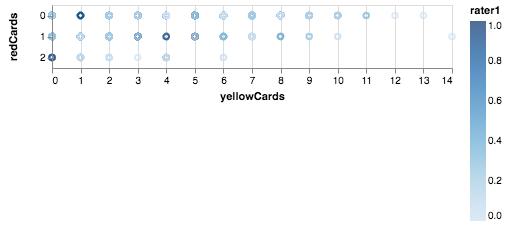

In [36]:
alt.Chart(RedCard_exists.reset_index()).mark_point().encode(
    x='yellowCards:Q',
    y='redCards:O',
    color = 'rater1'
)

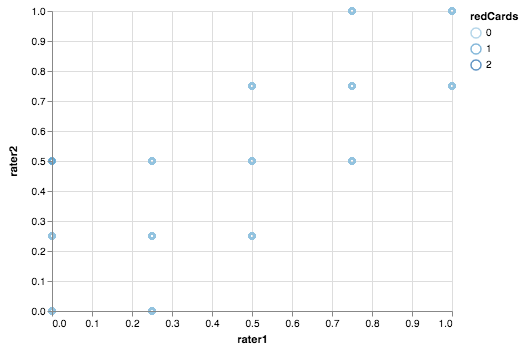

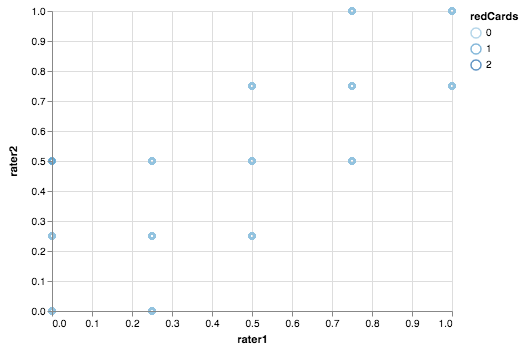

In [38]:
alt.Chart(RedCard_exists.reset_index()).mark_point().encode(
    x='rater1:Q',
    y='rater2:Q',
    color = 'redCards:O'
)

In [41]:
RedCard = RedCard_exists.dropna(subset=['height','weight','Alpha_3','meanIAT'])

In [42]:
Corrs = RedCard.corr(method = 'spearman')

In [45]:
Corrs

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
height,1.000000,0.788844,-0.033246,-0.030583,-0.018326,-0.011408,-0.076763,-0.044712,-0.003879,0.008389,-0.097794,-0.051868,0.022832,0.041366,-0.035783,0.082444,-0.082511,-0.090218,0.082264,-0.083281
weight,0.788844,1.000000,-0.027835,-0.023187,-0.017124,-0.011780,-0.062651,-0.028725,0.002842,0.008596,-0.046157,-0.024482,0.023643,0.037138,-0.002283,0.066757,-0.066836,-0.080603,0.066729,-0.067353
games,-0.033246,-0.027835,1.000000,0.670914,0.585393,0.618811,0.336359,0.457544,0.097847,0.102238,0.004945,0.001037,-0.031702,-0.249760,-0.114194,0.182163,-0.182087,-0.098809,0.182397,-0.183042
victories,-0.030583,-0.023187,0.670914,1.000000,0.178340,0.136351,0.354632,0.322510,0.060861,0.065052,-0.007584,-0.009354,-0.018685,-0.110808,-0.081986,0.107097,-0.107054,-0.054678,0.107197,-0.107700
ties,-0.018326,-0.017124,0.585393,0.178340,1.000000,0.229337,0.188863,0.318133,0.070805,0.075186,0.008636,0.007449,-0.014645,-0.152936,-0.077687,0.115977,-0.115926,-0.064680,0.116090,-0.116653
defeats,-0.011408,-0.011780,0.618811,0.136351,0.229337,1.000000,0.154388,0.342445,0.088114,0.092746,0.005148,0.001605,-0.025062,-0.195736,-0.088512,0.144726,-0.144621,-0.082404,0.144965,-0.145163
goals,-0.076763,-0.062651,0.336359,0.354632,0.188863,0.154388,1.000000,0.185439,0.028090,0.029826,0.011525,0.010752,-0.000479,-0.040784,-0.040814,0.067487,-0.067466,-0.039078,0.067563,-0.067576
yellowCards,-0.044712,-0.028725,0.457544,0.322510,0.318133,0.342445,0.185439,1.000000,0.073414,0.062292,0.006197,0.002192,-0.029989,-0.151489,-0.009200,0.040742,-0.040666,-0.003981,0.040924,-0.040798
yellowReds,-0.003879,0.002842,0.097847,0.060861,0.070805,0.088114,0.028090,0.073414,1.000000,0.015566,0.004603,0.003358,-0.012567,-0.046105,0.013245,-0.005497,0.005484,0.011518,-0.005496,0.005379
redCards,0.008389,0.008596,0.102238,0.065052,0.075186,0.092746,0.029826,0.062292,0.015566,1.000000,0.009611,0.008736,-0.001157,-0.031229,-0.006161,0.009715,-0.009671,-0.000204,0.009856,-0.009650


In [48]:
RedCard['avg_skin'] = (RedCard['rater1']+RedCard['rater2'])/2

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
RedCard.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avg_skin
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


In [50]:
RedCard.isna().sum()

playerShort         0
player              0
club                0
leagueCountry       0
birthday            0
height              0
weight              0
position         8258
games               0
victories           0
ties                0
defeats             0
goals               0
yellowCards         0
yellowReds          0
redCards            0
photoID             0
rater1              0
rater2              0
refNum              0
refCountry          0
Alpha_3             0
meanIAT             0
nIAT                0
seIAT               0
meanExp             0
nExp                0
seExp               0
avg_skin            0
dtype: int64

In [60]:
Skin_Groups = RedCard.groupby(['avg_skin','meanIAT']).agg({'redCards':'mean','yellowCards':'mean'}).reset_index()

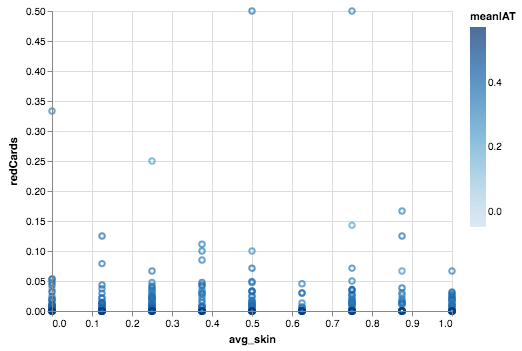

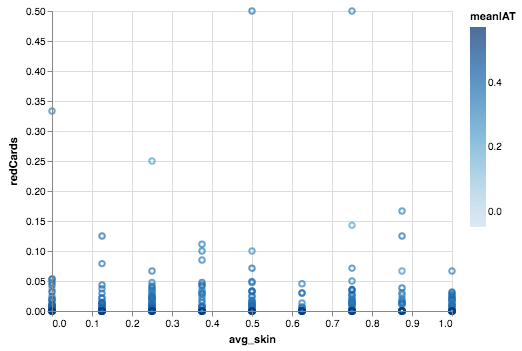

In [59]:
alt.Chart(Skin_Groups).mark_point().encode(
    x='avg_skin:Q',
    y='redCards:Q',
    color = 'meanIAT'
)

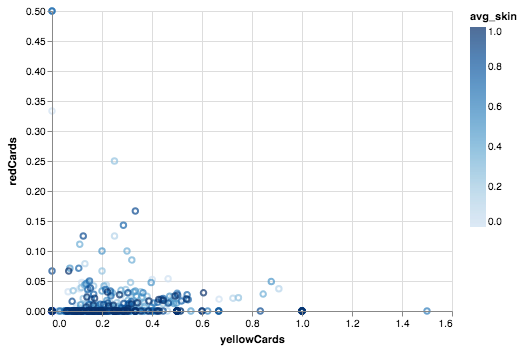

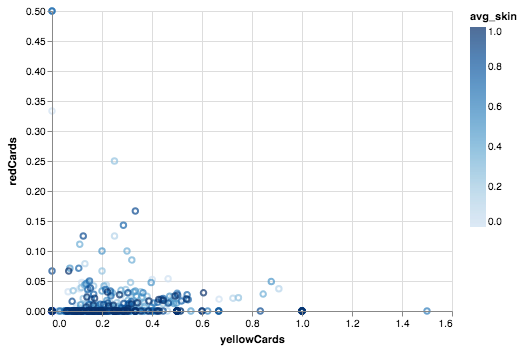

In [61]:
alt.Chart(Skin_Groups).mark_point().encode(
    x='yellowCards:Q',
    y='redCards:Q',
    color = 'avg_skin'
)

In [62]:
RedCard['reds_per_game']=RedCard['redCards']/RedCard['games']
RedCard['yellows_per_game']=RedCard['yellowCards']/RedCard['games']

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
def bar_plot(df, lower_box, lower_whisker, middle_line, upper_box, upper_whisker, x_field, y_title):
    # Define aggregate fields
    #lower_box = 'q1(people):Q'
    #lower_whisker = 'min(people):Q'
    #upper_box = 'q3(people):Q'
    #upper_whisker = 'max(people):Q'

    # Compose each layer individually
    lower_plot = alt.Chart(df).mark_rule().encode(
        y=alt.Y(lower_whisker, axis=alt.Axis(title=y_title)),
        y2=lower_box,
        x=x_field
    )

    middle_plot = alt.Chart(df).mark_bar(size=5.0).encode(
        y=lower_box,
        y2=upper_box,
        x=x_field
    )

    upper_plot = alt.Chart(df).mark_rule().encode(
        y=upper_whisker,
        y2=upper_box,
        x=x_field
    )

    middle_tick = alt.Chart(df).mark_tick(
        color='white',
        size=5.0
    ).encode(
        y=middle_line,
        x=x_field,
    )

    return lower_plot + middle_plot + upper_plot + middle_tick

In [65]:
RedCard['totalCards']=RedCard['redCards']+RedCard['yellowReds']+RedCard['yellowCards']

/Users/rebeccareitz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
RedCard['totalCards'].min()

0

In [67]:
RedCard['totalCards'].max()

17

In [68]:
Corr2 = RedCard.corr(method = 'spearman')

In [69]:
Corr2['avg_skin']

height             -0.081870
weight             -0.037446
games               0.005485
victories          -0.006649
ties                0.009365
defeats             0.004539
goals               0.010476
yellowCards         0.007090
yellowReds          0.004825
redCards            0.009924
rater1              0.963074
rater2              0.957860
refNum             -0.007175
refCountry          0.013787
meanIAT            -0.037317
nIAT               -0.069176
seIAT               0.069290
meanExp             0.044763
nExp               -0.069122
seExp               0.069544
avg_skin            1.000000
reds_per_game       0.009983
yellows_per_game    0.009503
totalCards          0.009882
Name: avg_skin, dtype: float64

In [70]:
Corr2['height']

height              1.000000
weight              0.788844
games              -0.033246
victories          -0.030583
ties               -0.018326
defeats            -0.011408
goals              -0.076763
yellowCards        -0.044712
yellowReds         -0.003879
redCards            0.008389
rater1             -0.097794
rater2             -0.051868
refNum              0.022832
refCountry          0.041366
meanIAT            -0.035783
nIAT                0.082444
seIAT              -0.082511
meanExp            -0.090218
nExp                0.082264
seExp              -0.083281
avg_skin           -0.081870
reds_per_game       0.008390
yellows_per_game   -0.040323
totalCards         -0.042647
Name: height, dtype: float64